In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.models import load_model
from sklearn import preprocessing
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv('bank-full.csv', sep = ';', nrows = 40000)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,-1,0,unknown,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,-1,0,unknown,yes
39997,54,admin.,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,-1,0,unknown,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,90,7,other,no


In [8]:
le = LabelEncoder()
min_max_scaler = preprocessing.MinMaxScaler()
dataMatrix = data.iloc[:, :]

for i in dataMatrix:
    dataMatrix[i] = le.fit_transform(dataMatrix[i])

dataY = dataMatrix.iloc[:, 16]
dataX = dataMatrix.iloc[:, 0:16]

dataX = min_max_scaler.fit_transform(dataX)
Xdataframe = pd.DataFrame(dataX)

X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size = 0.5)
Xdataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.565217,0.363636,0.5,0.666667,0.0,0.441443,1.0,0.0,1.0,0.133333,0.8,0.170143,0.000000,0.000000,0.000000,1.000000
1,0.362319,0.818182,1.0,0.333333,0.0,0.137996,1.0,0.0,1.0,0.133333,0.8,0.098435,0.000000,0.000000,0.000000,1.000000
2,0.202899,0.181818,0.5,0.333333,0.0,0.134054,1.0,1.0,1.0,0.133333,0.8,0.049544,0.000000,0.000000,0.000000,1.000000
3,0.405797,0.090909,0.5,1.000000,0.0,0.353388,1.0,0.0,1.0,0.133333,0.8,0.059974,0.000000,0.000000,0.000000,1.000000
4,0.202899,1.000000,1.0,1.000000,0.0,0.133908,0.0,0.0,1.0,0.133333,0.8,0.129074,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.492754,0.818182,0.5,0.666667,0.0,0.191443,0.0,0.0,0.0,0.066667,0.6,0.069752,0.000000,0.000000,0.000000,1.000000
39996,0.159420,0.363636,1.0,0.666667,0.0,0.589223,0.0,0.0,0.0,0.066667,0.6,0.155150,0.042553,0.000000,0.000000,1.000000
39997,0.507246,0.000000,0.0,0.333333,0.0,0.162967,0.0,0.0,0.0,0.066667,0.6,0.110821,0.000000,0.000000,0.000000,1.000000
39998,0.217391,0.363636,0.5,0.666667,0.0,0.286653,0.0,0.0,0.0,0.066667,0.6,0.222947,0.000000,0.198324,0.194444,0.333333


In [9]:
y_train = utils.to_categorical(y_train, 2)
y_test = utils.to_categorical(y_test, 2)
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [10]:
model = Sequential()
model.add(Dense(800, input_dim=16, activation="relu"))
model.add(Dense(400, activation="relu")) 
model.add(Dense(2, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               13600     
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 2)                 802       
                                                                 
Total params: 334,802
Trainable params: 334,802
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
history = model.fit(X_train, y_train, batch_size=400, epochs=25,  verbose=1, validation_split=0.2)

Epoch 1/25
40/40 [==============================] - 2s 27ms/step - loss: 0.2919 - accuracy: 0.9108 - val_loss: 0.2346 - val_accuracy: 0.9250
Epoch 2/25
40/40 [==============================] - 1s 24ms/step - loss: 0.2031 - accuracy: 0.9267 - val_loss: 0.1818 - val_accuracy: 0.9300
Epoch 3/25
40/40 [==============================] - 1s 24ms/step - loss: 0.1740 - accuracy: 0.9331 - val_loss: 0.1781 - val_accuracy: 0.9335
Epoch 4/25
40/40 [==============================] - 1s 24ms/step - loss: 0.1698 - accuracy: 0.9341 - val_loss: 0.1759 - val_accuracy: 0.9355
Epoch 5/25
40/40 [==============================] - 1s 24ms/step - loss: 0.1690 - accuracy: 0.9341 - val_loss: 0.1795 - val_accuracy: 0.9317
Epoch 6/25
40/40 [==============================] - 1s 23ms/step - loss: 0.1675 - accuracy: 0.9344 - val_loss: 0.1756 - val_accuracy: 0.9342
Epoch 7/25
40/40 [==============================] - 1s 35ms/step - loss: 0.1658 - accuracy: 0.9351 - val_loss: 0.1760 - val_accuracy: 0.9335
Epoch 8/25
40

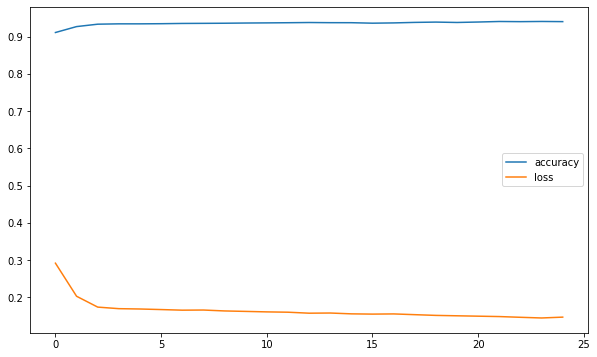

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

In [15]:
model.save("nsSave.h5")
files.download("nsSave.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
files.upload()
model = load_model("nsSave.h5")

Saving nsSave.h5 to nsSave (1).h5


In [17]:
#тест по количеству нейронов
for i in range(100, 1000, 100):
  model = Sequential()
  model.add(Dense(i, input_dim=16, activation="relu"))
  model.add(Dense(i/2, activation="relu")) 
  model.add(Dense(2, activation="softmax"))
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
  model.fit(X_train, y_train, batch_size=200, epochs=4,  verbose=0, validation_split=0.2)
  print("number neurons:", i, i/2, ";", "train data:", model.evaluate(X_train, y_train, verbose = 0), ";", "test data:", model.evaluate(X_test, y_test, verbose = 0), ";\n", sep=" ")

number neurons: 100 50.0 ; train data: [0.17547187209129333, 0.934499979019165] ; test data: [0.18026642501354218, 0.9308000206947327] ;

number neurons: 200 100.0 ; train data: [0.17125648260116577, 0.9343500137329102] ; test data: [0.17635318636894226, 0.9315000176429749] ;

number neurons: 300 150.0 ; train data: [0.16929535567760468, 0.9346500039100647] ; test data: [0.1754123568534851, 0.932200014591217] ;

number neurons: 400 200.0 ; train data: [0.1739763617515564, 0.9343500137329102] ; test data: [0.17933732271194458, 0.9332500100135803] ;

number neurons: 500 250.0 ; train data: [0.17195895314216614, 0.9333999752998352] ; test data: [0.17727407813072205, 0.9310500025749207] ;

number neurons: 600 300.0 ; train data: [0.16831982135772705, 0.9352999925613403] ; test data: [0.1750640869140625, 0.9317499995231628] ;

number neurons: 700 350.0 ; train data: [0.1669784039258957, 0.9347500205039978] ; test data: [0.17296333611011505, 0.932200014591217] ;

number neurons: 800 400.0 ; 

In [18]:
#тест по количеству слоёв
for i in range(1, 10, 1):
  model = Sequential()
  model.add(Dense(800, input_dim=16, activation="relu"))
  for j in range(1, i, 1):
    model.add(Dense(400, activation="relu")) 
  model.add(Dense(2, activation="softmax"))
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
  model.fit(X_train, y_train, batch_size=200, epochs=4,  verbose=0, validation_split=0.2)
  print("number layers:", i, ";", "train data:", model.evaluate(X_train, y_train, verbose = 0), ";", "test data:", model.evaluate(X_test, y_test, verbose = 0), ";\n", sep=" ")

number layers: 1 ; train data: [0.17390772700309753, 0.9343500137329102] ; test data: [0.17844262719154358, 0.932200014591217] ;

number layers: 2 ; train data: [0.17264677584171295, 0.9311500191688538] ; test data: [0.17961283028125763, 0.9293000102043152] ;

number layers: 3 ; train data: [0.16505928337574005, 0.93545001745224] ; test data: [0.1754731982946396, 0.931850016117096] ;

number layers: 4 ; train data: [0.1630304604768753, 0.9366000294685364] ; test data: [0.17129918932914734, 0.9325000047683716] ;

number layers: 5 ; train data: [0.1841786801815033, 0.9349499940872192] ; test data: [0.19412057101726532, 0.9340999722480774] ;

number layers: 6 ; train data: [0.16864992678165436, 0.9334999918937683] ; test data: [0.1757100522518158, 0.9305999875068665] ;

number layers: 7 ; train data: [0.16565126180648804, 0.9355499744415283] ; test data: [0.17297731339931488, 0.9327999949455261] ;

number layers: 8 ; train data: [0.16331897675991058, 0.9351999759674072] ; test data: [0.17

In [19]:
#тест по batch_size
for i in range(100, 1000, 100):
  model = Sequential()
  model.add(Dense(800, input_dim=16, activation="relu"))
  for j in range(1, 6, 1):
    model.add(Dense(400, activation="relu"))
  model.add(Dense(2, activation="softmax"))
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
  model.fit(X_train, y_train, batch_size=i, epochs=4,  verbose=0, validation_split=0.2)
  print("number of batch_size:", i, ";", "train data:", model.evaluate(X_train, y_train, verbose = 0), ";", "test data:", model.evaluate(X_test, y_test, verbose = 0), ";\n", sep=" ")

number of batch_size: 100 ; train data: [0.16337281465530396, 0.9362000226974487] ; test data: [0.17159901559352875, 0.9330000281333923] ;

number of batch_size: 200 ; train data: [0.1697693020105362, 0.9301000237464905] ; test data: [0.17547611892223358, 0.9319499731063843] ;

number of batch_size: 300 ; train data: [0.17971278727054596, 0.9330499768257141] ; test data: [0.1910712718963623, 0.9340000152587891] ;

number of batch_size: 400 ; train data: [0.16361550986766815, 0.93545001745224] ; test data: [0.173902228474617, 0.9320999979972839] ;

number of batch_size: 500 ; train data: [0.16400042176246643, 0.9359999895095825] ; test data: [0.1731412261724472, 0.9315500259399414] ;

number of batch_size: 600 ; train data: [0.16594044864177704, 0.9362499713897705] ; test data: [0.17425712943077087, 0.9323999881744385] ;

number of batch_size: 700 ; train data: [0.1699807196855545, 0.9335500001907349] ; test data: [0.17662151157855988, 0.9314500093460083] ;

number of batch_size: 800 ; 

In [20]:
#тест по количеству эпох
for i in range(4, 10, 1):
  model = Sequential()
  model.add(Dense(800, input_dim=16, activation="relu"))
  for j in range(1, 6, 1):
    model.add(Dense(400, activation="relu"))
  model.add(Dense(2, activation="softmax"))
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
  model.fit(X_train, y_train, batch_size=200, epochs=i,  verbose=0, validation_split=0.2)
  print("number of epochs:", i, ";", "train data:", model.evaluate(X_train, y_train, verbose = 0), ";", "test data:", model.evaluate(X_test, y_test, verbose = 0), ";\n", sep=" ")

number of epochs: 4 ; train data: [0.16521328687667847, 0.935949981212616] ; test data: [0.17240935564041138, 0.933899998664856] ;

number of epochs: 5 ; train data: [0.15974928438663483, 0.9373999834060669] ; test data: [0.17020364105701447, 0.9330000281333923] ;

number of epochs: 6 ; train data: [0.161124125123024, 0.9358000159263611] ; test data: [0.17332816123962402, 0.9302499890327454] ;

number of epochs: 7 ; train data: [0.15496215224266052, 0.9382500052452087] ; test data: [0.1692448854446411, 0.9334999918937683] ;

number of epochs: 8 ; train data: [0.17402537167072296, 0.9376500248908997] ; test data: [0.19547763466835022, 0.934249997138977] ;

number of epochs: 9 ; train data: [0.15326620638370514, 0.9394999742507935] ; test data: [0.1683681607246399, 0.9330000281333923] ;

